PREDICTION MODEL - LINEAR REGRESSION

# Importing libraries & Data

- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import seaborn as sns
sns.set()

- Importing Data 

In [2]:
df = pd.read_csv(r"C:\Users\DavidVicente\Desktop\IronHack\Final_Project\Apartment_Valuator\Data\cleaned_df.csv")
df.sample()

,title,sq_mt_built,n_rooms,n_bathrooms,floor,rent_price,buy_price,house_type_id,is_renewal_needed,is_new_development,...,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,Neighborhood_code,Neighborhood_name,District_code,District_name
20394,Piso en venta en Aravaca,144.0,3,3,1,2315,790000,Pisos,False,False,...,False,True,False,True,E,False,72,Aravaca,11,Moncloa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20941 entries, 0 to 20940
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 20941 non-null  object 
 1   sq_mt_built           20941 non-null  float64
 2   n_rooms               20941 non-null  int64  
 3   n_bathrooms           20941 non-null  int64  
 4   floor                 20941 non-null  object 
 5   rent_price            20941 non-null  int64  
 6   buy_price             20941 non-null  int64  
 7   house_type_id         20941 non-null  object 
 8   is_renewal_needed     20941 non-null  bool   
 9   is_new_development    20941 non-null  bool   
 10  has_ac                20941 non-null  bool   
 11  has_fitted_wardrobes  20941 non-null  bool   
 12  has_lift              20941 non-null  bool   
 13  is_exterior           20941 non-null  bool   
 14  has_garden            20941 non-null  bool   
 15  has_pool           

# Data Transformation

The df used is already cleaned, but mainly for visualization. In order to perform our prediction model we need to perform some transformations in our dataframe. 

## Removing unwanted columns

In [4]:
irrelevant_columns = [
                      'Neighborhood_name',
                        'District_name',
                        'buy_price'
                        
                      ]

df = df.drop(columns=irrelevant_columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20941 entries, 0 to 20940
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 20941 non-null  object 
 1   sq_mt_built           20941 non-null  float64
 2   n_rooms               20941 non-null  int64  
 3   n_bathrooms           20941 non-null  int64  
 4   floor                 20941 non-null  object 
 5   rent_price            20941 non-null  int64  
 6   house_type_id         20941 non-null  object 
 7   is_renewal_needed     20941 non-null  bool   
 8   is_new_development    20941 non-null  bool   
 9   has_ac                20941 non-null  bool   
 10  has_fitted_wardrobes  20941 non-null  bool   
 11  has_lift              20941 non-null  bool   
 12  is_exterior           20941 non-null  bool   
 13  has_garden            20941 non-null  bool   
 14  has_pool              20941 non-null  bool   
 15  has_terrace        

## Changing object type columns int 

### floor column grouping

In [5]:
df['floor'].unique()

array(['3', '4', '1', 'Bajo', '2', 'Otro', '7', '6', '5', '8', '9'],
      dtype=object)

In [6]:
floor_mapping = {'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'Bajo':10,'Otro':11}


df['floor'] = df['floor'].map(floor_mapping)
df['floor'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 20941 entries, 0 to 20940
Series name: floor
Non-Null Count  Dtype
--------------  -----
20941 non-null  int64
dtypes: int64(1)
memory usage: 163.7 KB


### house_type_id grouping

In [7]:
df['house_type_id'].unique()

array(['Pisos', 'Dúplex', 'Áticos', 'Casa o chalet'], dtype=object)

In [8]:
house_mapping = {'Pisos':1,'Dúplex':2,'Áticos':3,'Casa o chalet':4}


df['house_type_id'] = df['house_type_id'].map(house_mapping)
df['floor'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20941 entries, 0 to 20940
Series name: floor
Non-Null Count  Dtype
--------------  -----
20941 non-null  int64
dtypes: int64(1)
memory usage: 163.7 KB


## Dealing with Outliers

In the first cleaning we didn't remove any outlier, since we wanted to show all the data. Now we have to clean these outliers, since they can have a big impact on the prediction model result

In [11]:
df['rent_price'].describe()

count    2.094100e+04
mean    -5.043850e+04
std      8.756815e+05
min     -3.459028e+07
25%      7.270000e+02
50%      1.124000e+03
75%      1.705000e+03
max      2.517000e+03
Name: rent_price, dtype: float64

<AxesSubplot: >

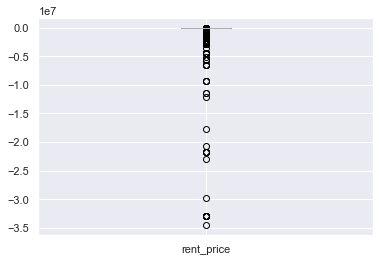

In [15]:
df.boxplot(column=['rent_price'])

Let's delete the negative values from the df

<AxesSubplot: >

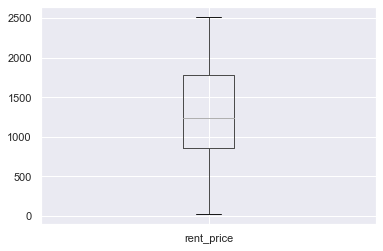

In [18]:
df= df.drop(df[df['rent_price'] < 0].index)
df.boxplot(column=['rent_price'])

In [20]:
df['rent_price'].describe()

count    18441.000000
mean      1352.915677
std        587.816967
min         18.000000
25%        851.000000
50%       1238.000000
75%       1781.000000
max       2517.000000
Name: rent_price, dtype: float64

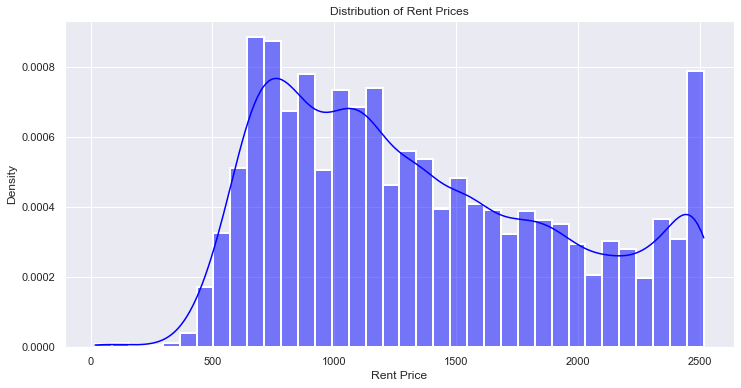

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['rent_price'], kde=True, stat="density", linewidth=2, color='blue')
plt.xlabel('Rent Price')
plt.ylabel('Density')
plt.title('Distribution of Rent Prices')
plt.show()

- vodfksjfvfsokv

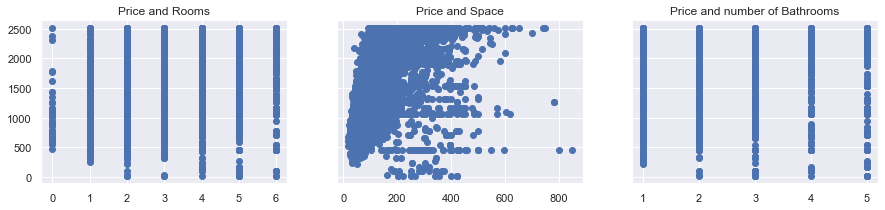

In [21]:
#plotting some parameters together

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(df['n_rooms'],df['rent_price'])
ax1.set_title('Price and Rooms')
ax2.scatter(df['sq_mt_built'],df['rent_price'])
ax2.set_title('Price and Space')
ax3.scatter(df['n_bathrooms'],df['rent_price'])
ax3.set_title('Price and number of Bathrooms')


plt.show()

- Correlation

C:\Users\DavidVicente\AppData\Local\Temp\ipykernel_15604\1502721121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


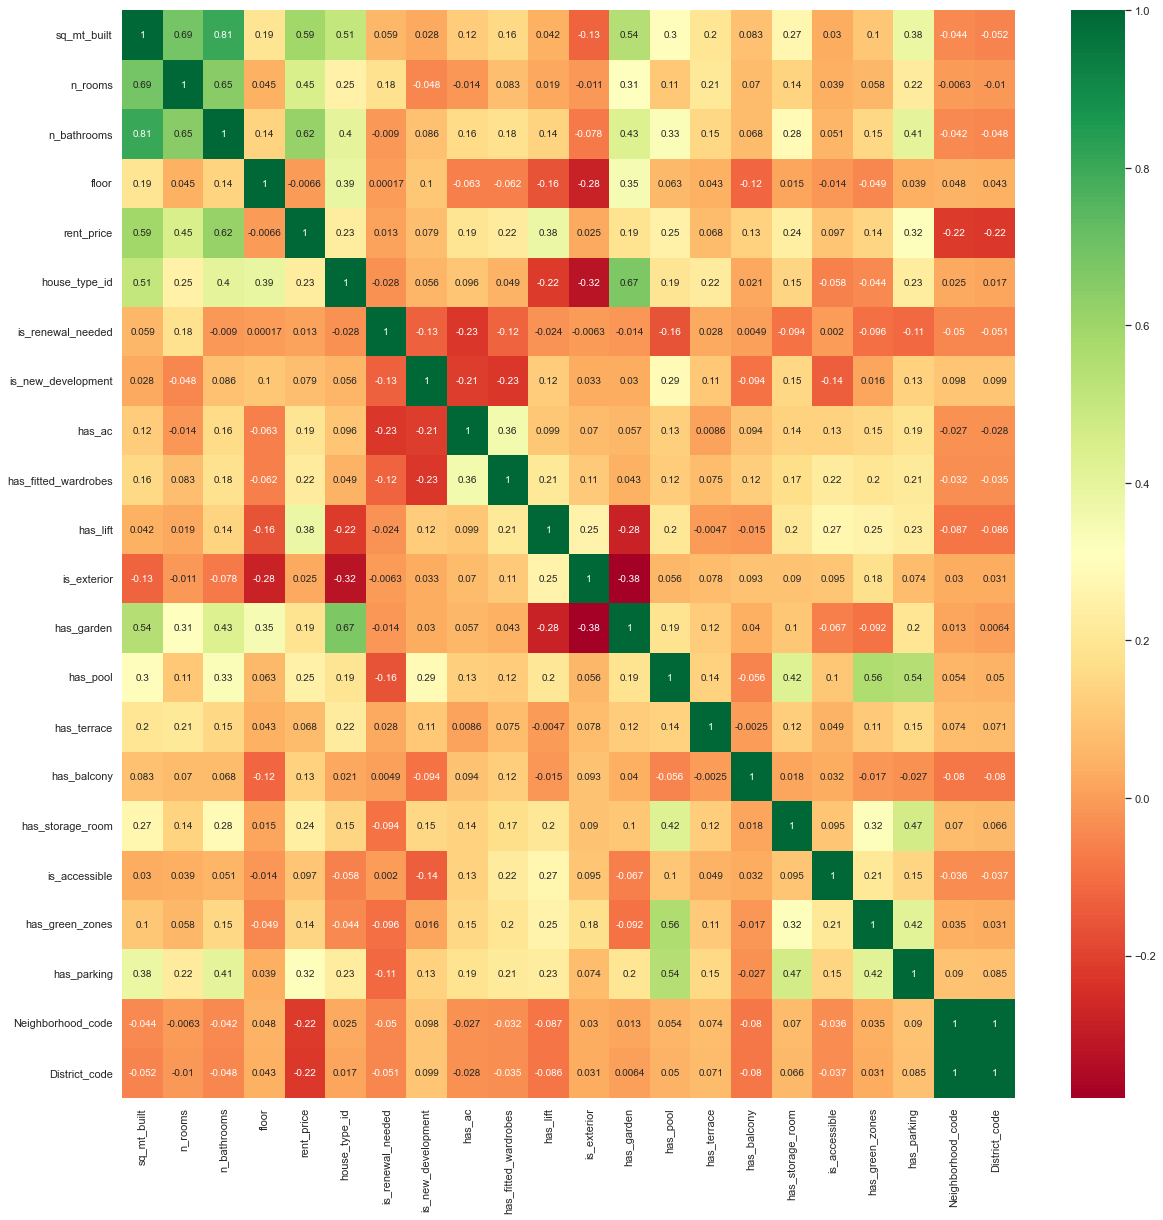

In [22]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Dropping column before performing the linear regression model

In [23]:
irrelevant_columns = [
                      'is_renewal_needed',
                      'Neighborhood_code',
                        'energy_certificate',
                        'title'
                      ]

df = df.drop(columns=irrelevant_columns)


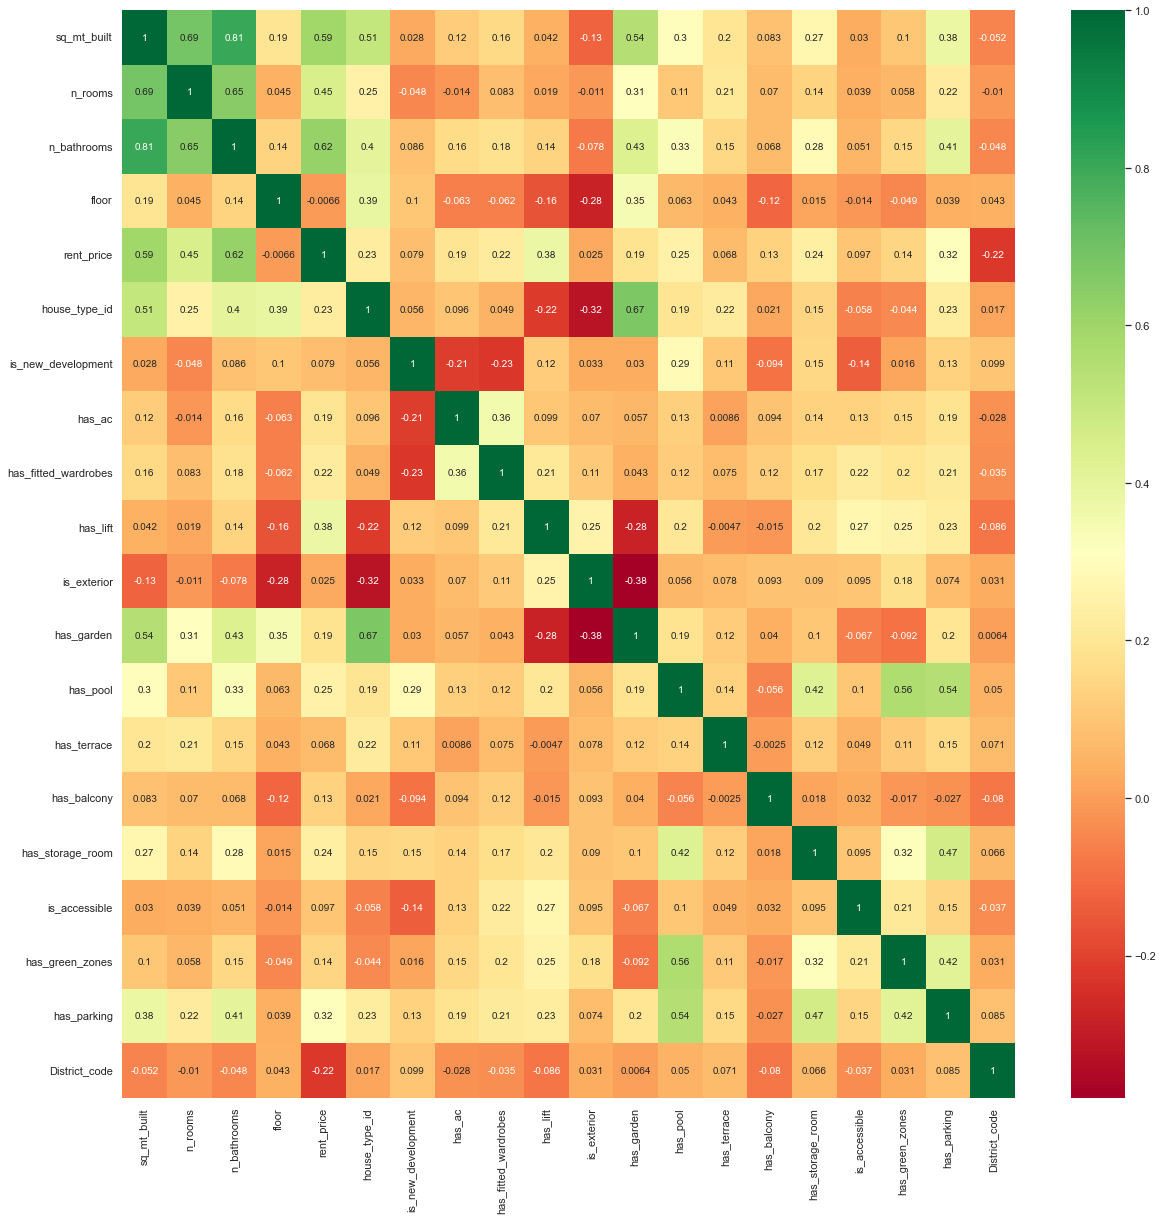

In [24]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
df.shape

(18441, 20)

## DF Export

In [25]:
df.to_csv(r"C:\Users\DavidVicente\Desktop\IronHack\Final_Project\Apartment_Valuator\Data\rent_model_df.csv", index=False)

## Linear regression

In [28]:
# Define the features and target variable
X = df[['sq_mt_built', 'n_rooms', 'floor','n_bathrooms', 'house_type_id', 
        'is_new_development', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
        'is_exterior', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony',
        'has_storage_room', 'is_accessible', 'has_green_zones', 'has_parking',
        'District_code']]
y = df['rent_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a Linear Regression model and fit it to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print(f'R-squared score: {r2:.3f}')


R-squared score: 0.532


## Inputing data to get the price

In [18]:


# Define the features and target variable
X = df[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'house_type_id', 
        'is_new_development', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
        'is_exterior', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony',
        'has_storage_room', 'is_accessible', 'has_green_zones', 'has_parking',
        'District_code']]
y = df['buy_price']

# Create a Linear Regression model and fit it to the data
lr = LinearRegression()
lr.fit(X, y)

# Input values for the features
sq_mt_built = float(input('Enter the square meters built: '))
n_rooms = int(input('Enter the number of rooms: '))
n_bathrooms = int(input('Enter the number of bathrooms: '))
floor = int(input('Enter the floor number: '))
house_type_id = int(input('Enter the house type ID: '))
is_new_development = int(input('Enter 1 if it is a new development, 0 otherwise: '))
has_ac = int(input('Enter 1 if it has air conditioning, 0 otherwise: '))
has_fitted_wardrobes = int(input('Enter 1 if it has fitted wardrobes, 0 otherwise: '))
has_lift = int(input('Enter 1 if it has a lift, 0 otherwise: '))
is_exterior = int(input('Enter 1 if it is exterior, 0 otherwise: '))
has_garden = int(input('Enter 1 if it has a garden, 0 otherwise: '))
has_pool = int(input('Enter 1 if it has a pool, 0 otherwise: '))
has_terrace = int(input('Enter 1 if it has a terrace, 0 otherwise: '))
has_balcony = int(input('Enter 1 if it has a balcony, 0 otherwise: '))
has_storage_room = int(input('Enter 1 if it has a storage room, 0 otherwise: '))
is_accessible = int(input('Enter 1 if it is accessible, 0 otherwise: '))
has_green_zones = int(input('Enter 1 if it has green zones, 0 otherwise: '))
has_parking = int(input('Enter 1 if it has parking, 0 otherwise: '))
district_code = int(input('Enter the district code: '))

# Make a prediction based on the input values
prediction = lr.predict([[sq_mt_built, n_rooms, n_bathrooms, floor, house_type_id, 
                          is_new_development, has_ac, has_fitted_wardrobes, has_lift,
                          is_exterior, has_garden, has_pool, has_terrace, has_balcony,
                          has_storage_room, is_accessible, has_green_zones, has_parking,
                          district_code]])

# Print the predicted buy price
print(f'Predicted buy price: {prediction[0]:,.2f}')




KeyboardInterrupt: Interrupted by user

In [22]:
df['house_type_id'].unique()

array([1, 2, 3, 4], dtype=int64)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19893 entries, 0 to 20940
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sq_mt_built           19893 non-null  float64
 1   n_rooms               19893 non-null  int64  
 2   n_bathrooms           19893 non-null  int64  
 3   floor                 19893 non-null  int64  
 4   buy_price             19893 non-null  int64  
 5   house_type_id         19893 non-null  int64  
 6   is_new_development    19893 non-null  bool   
 7   has_ac                19893 non-null  bool   
 8   has_fitted_wardrobes  19893 non-null  bool   
 9   has_lift              19893 non-null  bool   
 10  is_exterior           19893 non-null  bool   
 11  has_garden            19893 non-null  bool   
 12  has_pool              19893 non-null  bool   
 13  has_terrace           19893 non-null  bool   
 14  has_balcony           19893 non-null  bool   
 15  has_storage_room   